In [ ]:
!pip install tensorflow
!pip install opencv-python
import os
import numpy as np
import cv2
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

from google.colab import drive
drive.mount('/content/drive')

# Paths
TRAIN_DIR = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
TEST_DIR = '/content/drive/MyDrive/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

# Image size
IMG_SIZE = (224, 224)

# Get class names from folders
class_names = sorted(os.listdir(TRAIN_DIR))
num_classes = len(class_names)
print(f"Classes: {class_names}")


Mounted at /content/drive
Classes: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation='softmax')  # 7 classes for ISIC
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,121 (42.61 MB)

 Trainable params: 11,170,121 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)  # Optional split

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 2020 images belonging to 9 classes.
Found 219 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


In [ ]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 1783s 28s/step - accuracy: 0.2112 - loss: 2.0804 - val_accuracy: 0.2009 - val_loss: 2.1435
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 70s 455ms/step - accuracy: 0.3216 - loss: 1.9099 - val_accuracy: 0.3105 - val_loss: 1.7992
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 444ms/step - accuracy: 0.3994 - loss: 1.7365 - val_accuracy: 0.3288 - val_loss: 1.7852
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 29s 458ms/step - accuracy: 0.4399 - loss: 1.6696 - val_accuracy: 0.3699 - val_loss: 1.7350
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 436ms/step - accuracy: 0.4734 - loss: 1.5767 - val_accuracy: 0.2785 - val_loss: 1.8443
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 437ms/step - accuracy: 0.3823 - loss: 1.7499 - val_accuracy: 0.4429 - val_loss: 1.6753
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 436ms/step - accuracy: 0.4873 - loss: 1.5197 - val_accuracy: 0.4658 - val_loss: 1.6055
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 28s 437ms/step - accuracy: 0.5206 - loss: 1.4578 - val_accu

4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 16s/step - accuracy: 0.3353 - loss: 2.3121
Test Accuracy: 0.36


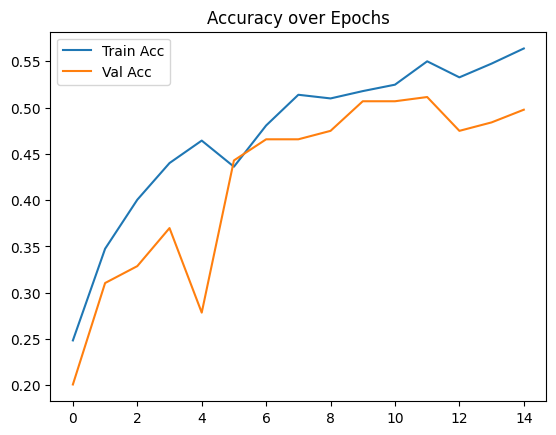

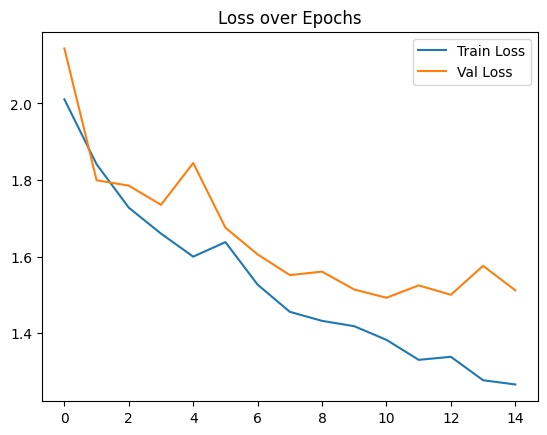

In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc:.2f}")

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


In [ ]:
model.save('isic_skin_cancer_cnn_model.h5')


NameError: name 'model' is not defined